In [1]:
import matplotlib.pyplot as plt
import ds_functions as ds
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import scipy.stats as _stats
import numpy as np
import config as cfg
import math
from matplotlib.ticker import MultipleLocator, FuncFormatter

register_matplotlib_converters()

# Heart Failure Dataset

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## Dimensionality

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


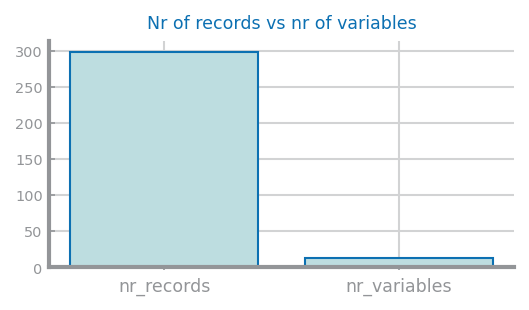

In [4]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [5]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
data['sex'] = data['sex'].astype('category')
for c in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']:
    data[c] = data[c].astype('bool')

data['sex'] = data['sex'].map({1: 'Male', 0: 'Female'})

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 600x450 with 0 Axes>

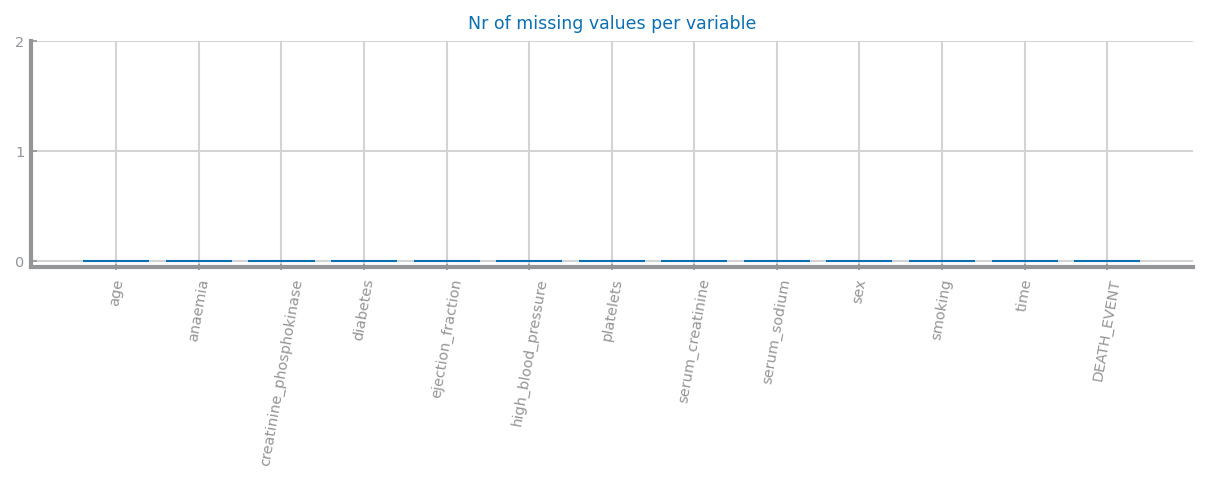

In [7]:
plt.figure()
mv = {var: data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

mv.values()

## Granularity

In [8]:
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
data.describe(include=['bool','category','float64','int64'])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299,299.000000,299,299.000000,299,299.000000,299.00000,299.000000,299,299,299.000000,299
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,Male,False,NaN,False
freq,NaN,170,NaN,174,NaN,194,NaN,NaN,NaN,194,203,NaN,203
mean,60.833893,NaN,581.839465,NaN,38.083612,NaN,263358.029264,1.39388,136.625418,NaN,NaN,130.260870,NaN
std,11.894809,NaN,970.287881,NaN,11.834841,NaN,97804.236869,1.03451,4.412477,NaN,NaN,77.614208,NaN
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.50000,113.000000,NaN,NaN,4.000000,NaN
25%,51.000000,NaN,116.500000,NaN,30.000000,NaN,212500.000000,0.90000,134.000000,NaN,NaN,73.000000,NaN
50%,60.000000,NaN,250.000000,NaN,38.000000,NaN,262000.000000,1.10000,137.000000,NaN,NaN,115.000000,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303500.000000,1.40000,140.000000,NaN,NaN,203.000000,NaN


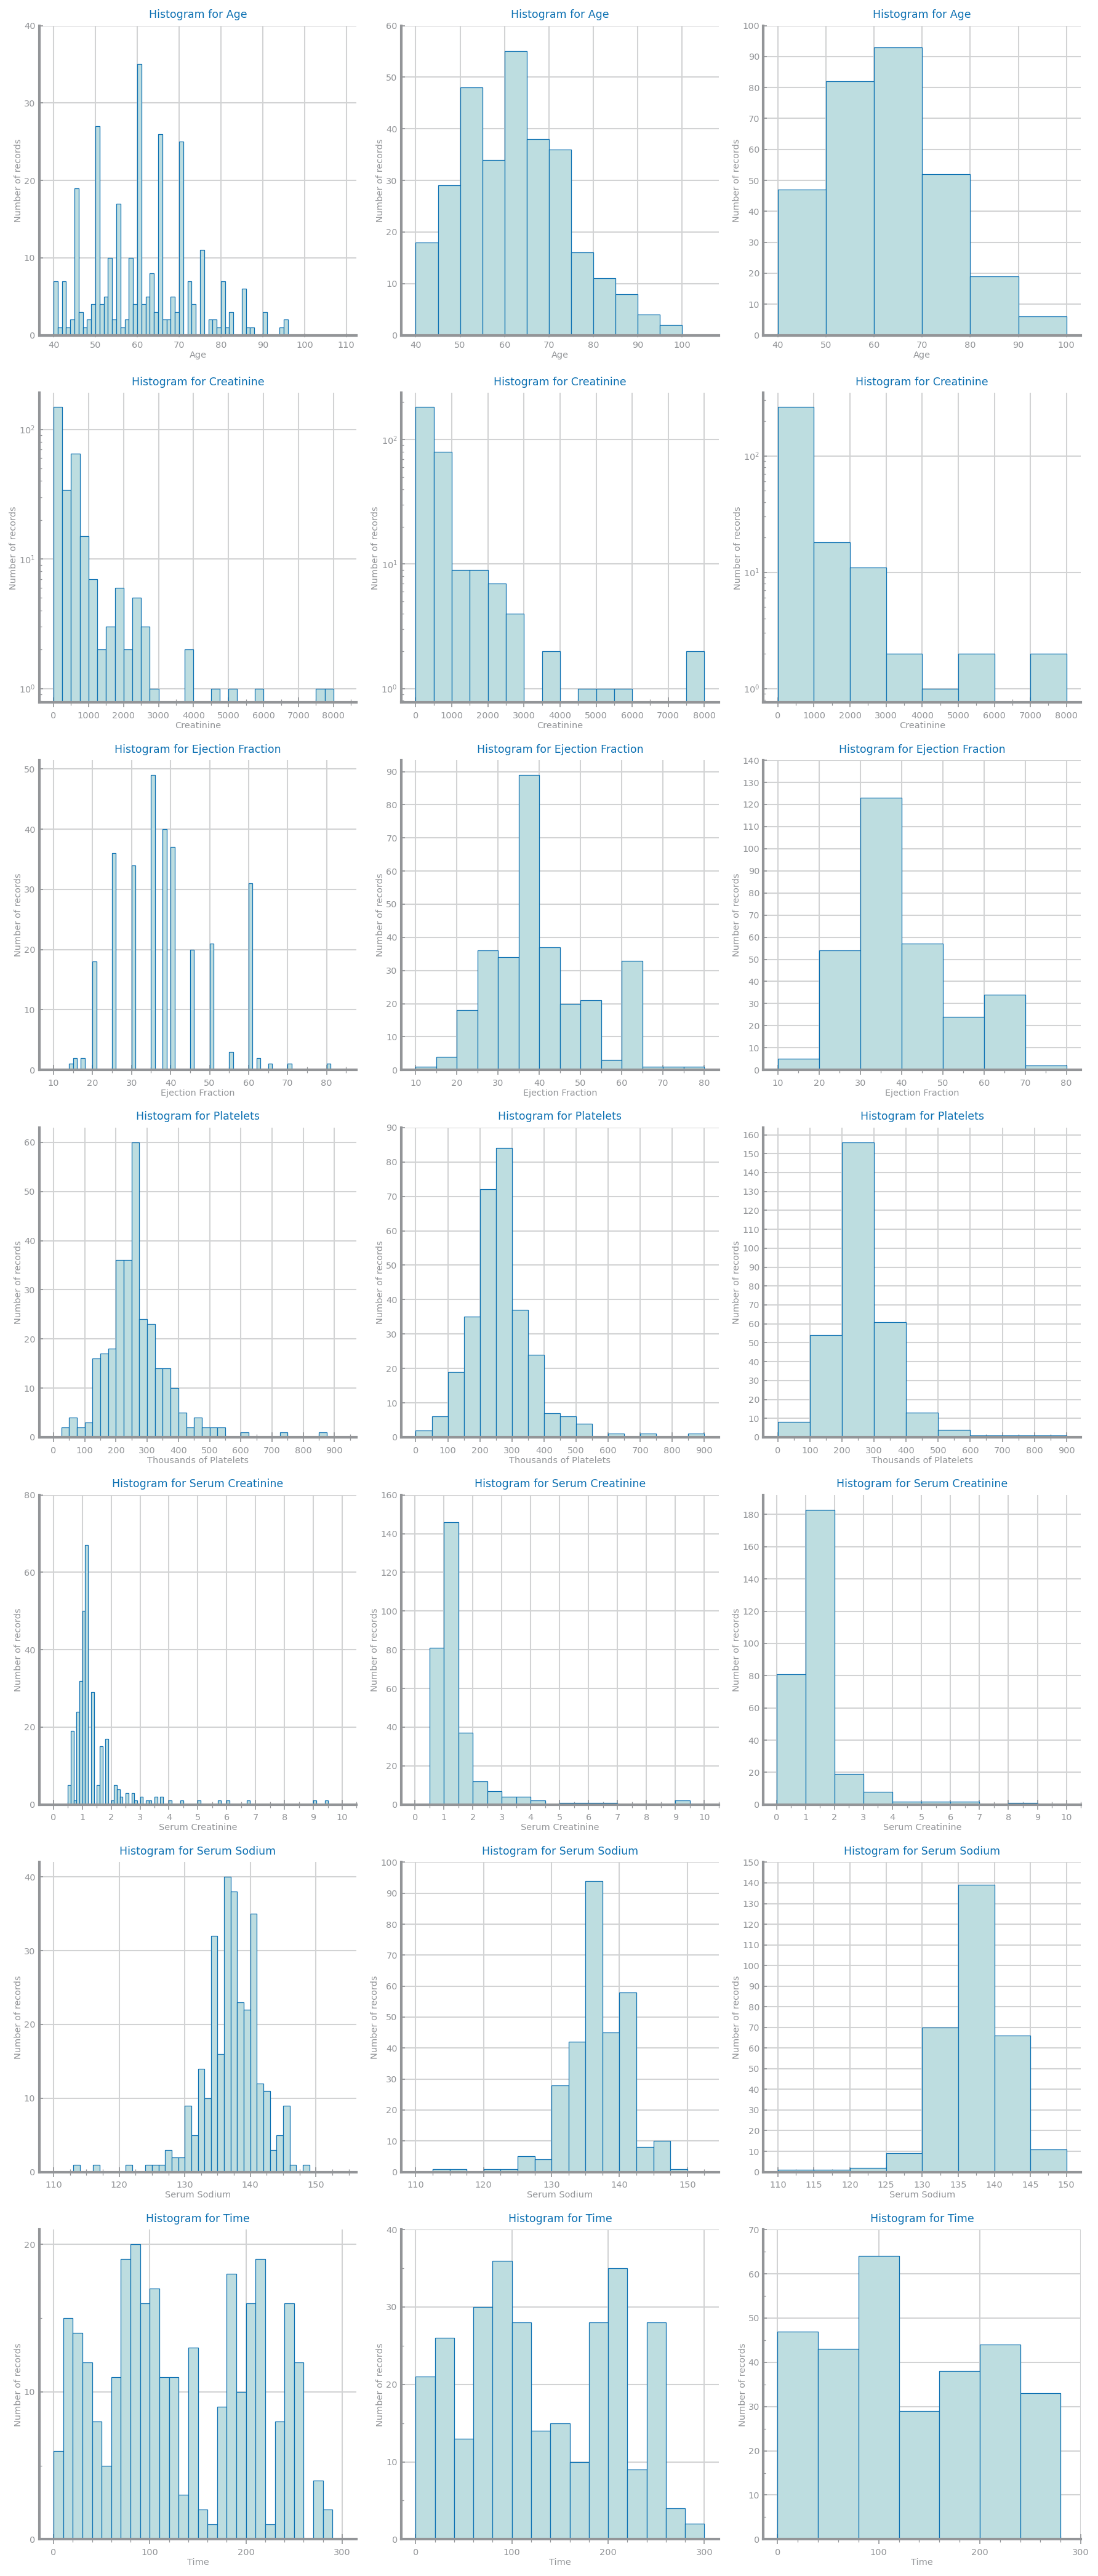

In [9]:
variables = data.select_dtypes(include=['float64','int64']).columns
#rows, cols = ds.choose_grid(len(variables))
rows, cols = variables.size, 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))

### Age
i = 0
bins_step = (1, 5, 10)
max_y = (50, 65, 105)
for j in range(3):
    axs[i,j].hist(data['age'].values, range=[40, 100], bins=np.arange(40, 110, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    # axs[i,j].set_ylim(0, 100)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].set_title('Histogram for Age')
    axs[i,j].set_xlabel('Age')
    axs[i,j].set_ylabel('Number of records')

### Creatinine Phosphokinase
i = i + 1
bins_step = (250, 500, 1000)
for j in range(3):
    axs[i,j].hist(data['creatinine_phosphokinase'].values, bins=np.arange(0, 8500, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    # axs[i,j].set_ylim(0, 100)
    # axs[i,j].grid(b=True, which='minor', axis='y', color="#f0efeb")
    axs[i,j].set_yscale("log")
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(500))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(1000))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Creatinine')
    axs[i,j].set_xlabel('Creatinine')
    axs[i,j].set_ylabel('Number of records')

### Ejection Fraction
i = i + 1
bins_step = (1, 5, 10)
max_y = (55, 95, 145)
for j in range(3):
    axs[i,j].hist(data['ejection_fraction'].values, bins=np.arange(10, 85, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(5))
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Ejection Fraction')
    axs[i,j].set_xlabel('Ejection Fraction')
    axs[i,j].set_ylabel('Number of records')

### Platelets
i = i + 1
bins_step =  (25000, 50000, 100000)
max_y = (65, 95, 165)
for j in range(3):
    axs[i,j].hist(data['platelets'].values, bins=np.arange(0, 950000, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(50000))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(100000))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Platelets')
    axs[i,j].set_xlabel('Thousands of Platelets')
    axs[i,j].set_ylabel('Number of records')

### serum_creatinine
i = i + 1
bins_step = (0.1, 0.5, 1)
max_y = (85, 165, 195)
for j in range(3):
    axs[i,j].hist(data['serum_creatinine'].values, bins=np.arange(0, 10, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 20))
    axs[i,j].set_xticks(np.arange(0, 11, 0.5))
    # axs[i,j].set_xticks(np.arange(0, 305, 100))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(1))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Serum Creatinine')
    axs[i,j].set_xlabel('Serum Creatinine')
    axs[i,j].set_ylabel('Number of records')

### serum_sodium
i = i + 1
bins_step = (1, 2.5, 5)
max_y = (45, 105, 155)
for j in range(3):
    axs[i,j].hist(data['serum_sodium'].values, bins=np.arange(110, 155, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(2.5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Serum Sodium')
    axs[i,j].set_xlabel('Serum Sodium')
    axs[i,j].set_ylabel('Number of records')

### time
i = i + 1
bins_step = (10, 20, 40)
max_y = (25, 45, 75)
for j in range(3):
    axs[i,j].hist(data['time'].values, bins=np.arange(0, 305, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_xticks(np.arange(0, 305, 100))
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(20))
    axs[i,j].yaxis.set_minor_locator(MultipleLocator(5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Time')
    axs[i,j].set_xlabel('Time')
    axs[i,j].set_ylabel('Number of records')

plt.tight_layout()



# Distribution

In [10]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


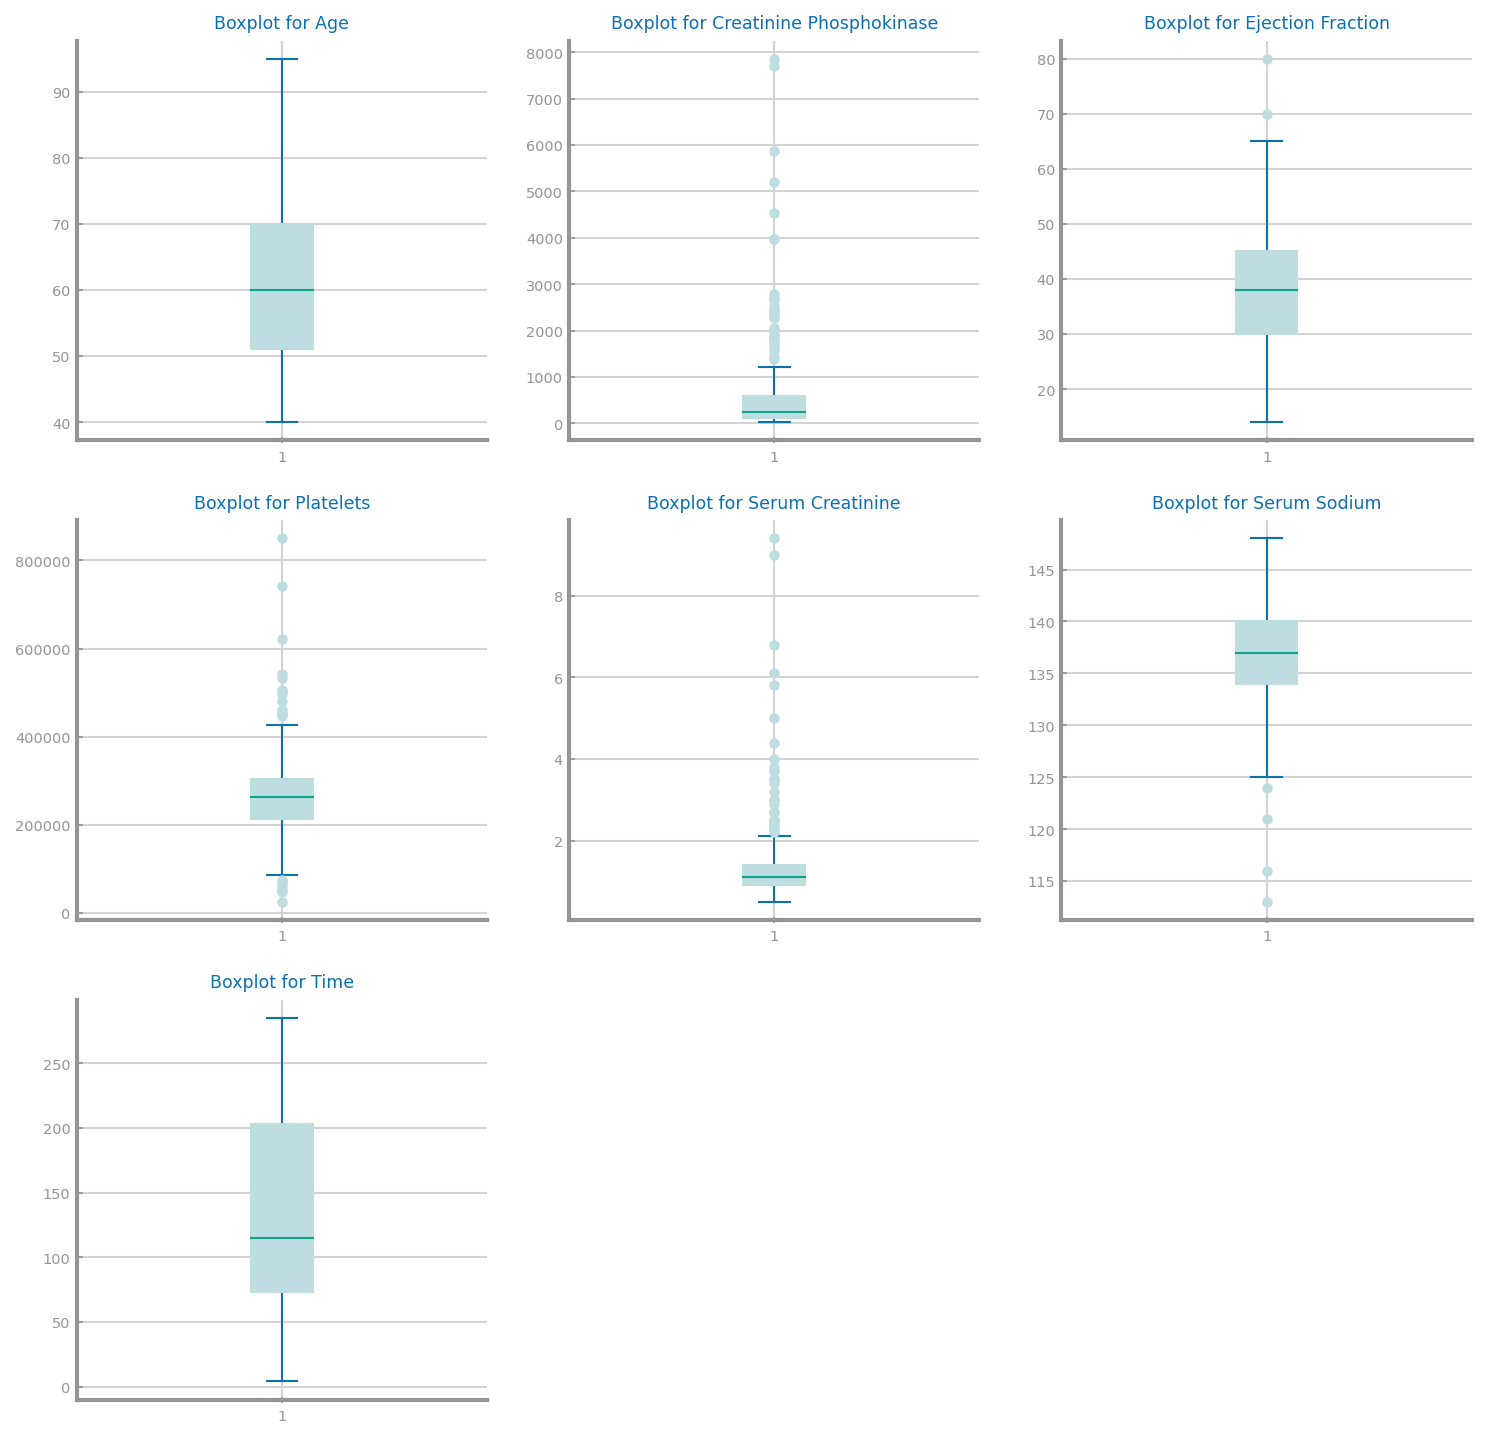

In [22]:
numeric_vars = data.select_dtypes(include=['float64','int64']).columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    new_var_name = numeric_vars[n].replace("_", " ").title()
    axs[i, j].set_title(f'Boxplot for {new_var_name}')
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values, whis=1.5)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= len(numeric_vars):
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

In [ ]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

for n in range(len(numeric_vars)):
    new_data = data[numeric_vars[n]].dropna()
    ds.histogram_with_distributions(axs[i, j], new_data, numeric_vars[n].replace("_", " ").title())

    # Fix plot ticks
    min, max, interval = 0, 0, 0
    if numeric_vars[n] == "age":
        min = int(new_data.min())
        max = int(new_data.max())
        interval = 10
    elif numeric_vars[n] == "creatinine_phosphokinase":
        max = 8000
        interval = 1000
    elif numeric_vars[n] == "ejection_fraction":
        min = 10
        max = 80
        interval = 10
    elif numeric_vars[n] == "platelets":
        max = 850000
        interval = 200000
    elif numeric_vars[n] == "serum_creatinine":
        max = 10
        interval = 1
    elif numeric_vars[n] == "serum_sodium":
        min = 100
        max = 150
        interval = 10
    else:
        max = 300
        interval = 50

    tick_list = list(range(min, max, interval))
    axs[i, j].set_xticks(tick_list)
    axs[i, j].set_xticklabels(tick_list)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= len(numeric_vars):
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

In [ ]:
data.describe(include=['bool','category'])

In [ ]:
symbolic_vars = data.select_dtypes(include=['bool','category']).columns
for v in symbolic_vars:
    print(v, data[v].unique())

In [ ]:
rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0

for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts()
    counts_list = counts.index.to_list()

    if data[symbolic_vars[n]].dtype == np.bool:
        counts_list = list(map(lambda x: str(x), counts_list))
    
    new_var_name = symbolic_vars[n].replace("_", " ").title()
    graph_title = f'Histogram for {new_var_name}'
    ds.bar_chart(counts_list, counts.values, ax=axs[i, j], title=graph_title,
                 xlabel=new_var_name, ylabel='nr records')

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

plt.show()

# Toxicity Dataset

In [ ]:
data2 = pd.read_csv('data/qsar_oral_toxicity.csv', sep=';', header=None)

## Dimensionality

In [ ]:
data2

In [ ]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data2.shape[0], 'nr_variables': data2.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [ ]:
data2.dtypes

In [ ]:
## Should we? YES
for c in data2.columns[:-1]:
    data2[c] = data2[c].astype('bool')
data2[data2.columns[-1]] = data2[data2.columns[-1]].astype('category')
data2.rename(columns={1024: 'toxic'}, inplace=True)
data2.dtypes

In [ ]:
plt.figure()
mv = {str(var): data2[var].isna().sum() for var in data2 if data2[var].isna().sum() > 0}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)
plt.show()

## Granularity

All of the variables are symbolic and so there is no granularity analysis to be done.

## Distribution

In [ ]:
data2.describe()

In [ ]:
data2.describe(include=['bool','category'])

In [ ]:
symbolic_vars_toxic = data2.select_dtypes(include=['bool','category']).columns
rows = math.ceil(len(symbolic_vars_toxic)/2)
fig, axs = plt.subplots(rows, rows, figsize=(rows, rows), squeeze=False)
i, j = 0, 0

for n in range(len(symbolic_vars_toxic)):
    counts = data2[symbolic_vars_toxic[n]].value_counts()
    counts_list = counts.index.to_list()

    if data2[symbolic_vars_toxic[n]].dtype == np.bool:
        counts_list = list(map(lambda x: "1" if x else "0", counts_list))
    
    new_var_name = str(symbolic_vars_toxic[n])
    graph_title = f'Histogram {new_var_name}'
    ds.bar_chart(counts_list, counts.values, ax=axs[i, j], title=graph_title,
                 xlabel=new_var_name, ylabel='nr records')

    i, j = (i + 1, 0) if (n+1) % rows == 0 else (i, j + 1)

plt.tight_layout()
plt.show()